###  Regresión y regresión

# Plan
* Pasar y extensión py
* Abrir en spider
* Acumular resultados
* Cargar en power bi
* Dormir

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
conGraficos=True

# Funciones

In [4]:
def hm_corr_graf(corr_matrix_V2, cat):
    aux=pd.pivot_table(corr_matrix_V2,columns=['variable_2'],index=['variable_1'],values=['r'])
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
    sns.heatmap(
        aux,
        annot     = True,
        cbar      = False,
        annot_kws = {"size": 10},
        vmin      = -0.5,
        vmax      = 0.5,
        center    = 0,
        cmap      = sns.diverging_palette(20, 220, n=200),
        square    = True,
        ax        = ax
    )
    ax.set_xticklabels(
        ax.get_xticklabels(),
        rotation = 45,
        horizontalalignment = 'right',
    )
    ax.tick_params(labelsize = 10)
    ax.set_title(cat)

In [5]:
# para ver el grado de correlación entre las variables disponibles.
def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matrix de correlación de pandas en formato tidy
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)

In [6]:
def dic_corr_ind(data):
    corr_matrix = data.select_dtypes(include=['float64', 'int','int64']).corr(method='spearman')
    corr_tab=tidy_corr_matrix(corr_matrix)
    corr_tab_bajas=corr_tab[corr_tab['variable_2']=='ind_churn'].drop(columns=['variable_2'])
    corr_tab_bajas=corr_tab_bajas[~corr_tab_bajas['variable_1'].isin(['val_muestras_ok'])]
    
    #res_corr_total_var_nacional=corr_tab_bajas[corr_tab_bajas['variable_1'].isin(sel_variables_razones)]
    res_corr_total_raz_nacional=corr_tab_bajas[corr_tab_bajas['variable_1'].isin(sel_variables_causas2)]
    #res_corr_total_var_nacional.drop(columns=['abs_r'],inplace=True)
    res_corr_total_raz_nacional.drop(columns=['abs_r'],inplace=True)
    
    #corr_tab_razones=corr_tab[corr_tab['variable_2'].isin(sel_variables_razones)]
    #corr_tab_razones=corr_tab_razones[corr_tab_razones['variable_1'].isin(sel_variables_causas2)]
    #corr_tab_razones=corr_tab_razones[~corr_tab_razones['variable_1'].isin(['BAJAS_TOTAL'])]
    #corr_tab_razones=corr_tab_razones[~corr_tab_razones['variable_2'].isin(['BAJAS_TOTAL'])]
    
    res_corr_total_raz_nacional=res_corr_total_raz_nacional.sort_values('variable_1')
    
    #return res_corr_total_raz_nacional, res_corr_total_var_nacional, corr_tab_razones
    return res_corr_total_raz_nacional

In [7]:
def dic_corr_mes_ind(data):
    #res_corr_total_var=res_corr_total_var_nacional
    res_corr_total_raz=res_corr_total_raz_nacional
    dic_resultados={}
    
    for i in range(1,12):
        print(i)
        dic_aux={}
        data_aux=data[data['FECHA']==i]    
        corr_matrix = data_aux.select_dtypes(include=['float64', 'int','int64']).corr(method='spearman')
        corr_tab=tidy_corr_matrix(corr_matrix)
        corr_tab_bajas=corr_tab[corr_tab['variable_2']=='ind_churn'].drop(columns=['variable_2'])
        #corr_tab_bajas=corr_tab_bajas[~corr_tab_bajas['variable_1'].isin(['val_muestras_ok'])]    
        dic_aux['total']=corr_tab_bajas    
        #corr_tab_razones=corr_tab[corr_tab['variable_2'].isin(sel_variables_razones)]
        #corr_tab_razones=corr_tab_razones[~corr_tab_razones['variable_1'].isin(['BAJAS_TOTAL'])]
        #corr_tab_razones=corr_tab_razones[~corr_tab_razones['variable_2'].isin(['BAJAS_TOTAL'])]
        #corr_tab_razones=corr_tab_razones[corr_tab_razones['variable_2'].isin(sel_variables_razones)]
        #corr_tab_razones=corr_tab_razones[corr_tab_razones['variable_1'].isin(sel_variables_causas2)]    
        #dic_aux['razones']=corr_tab_razones
        dic_resultados[i]=dic_aux

    for i in range(1,12):
        print(i)
        #aux_tab_var=dic_resultados[i]['total'][dic_resultados[i]['total']['variable_1'].isin(sel_variables_razones)]
        aux_tab_sel=dic_resultados[i]['total'][dic_resultados[i]['total']['variable_1'].isin(sel_variables_causas2)]
        #aux_tab_var.drop(columns=['abs_r'],inplace=True)
        aux_tab_sel.drop(columns=['abs_r'],inplace=True)
        #aux_tab_var.columns=['variable_1',str(i)+'_r']
        ###aux_tab_sel.columns=['variable_1',str(i)+'_r']    
        aux_tab_sel.columns=['variable_1',i]
        #res_corr_total_var=res_corr_total_var.merge(aux_tab_var,left_on='variable_1',right_on='variable_1', how='left')
        res_corr_total_raz=res_corr_total_raz.merge(aux_tab_sel,left_on='variable_1',right_on='variable_1', how='left')
    
    res_corr_total_raz_T=res_corr_total_raz.T
    res_corr_total_raz_T.columns = res_corr_total_raz_T.iloc[0]
    res_corr_total_raz_T = res_corr_total_raz_T.iloc[2:]   
    
    #res_corr_total_var_T=res_corr_total_var.T
    #res_corr_total_var_T.columns = res_corr_total_var_T.iloc[0]
    #res_corr_total_var_T = res_corr_total_var_T.iloc[1:]
    
    #return res_corr_total_raz_T, res_corr_total_var_T
    return res_corr_total_raz_T

In [8]:
def iter_regresion_VIF(data_reg):    
    i=0
    flag=1
    variables_eliminar=['ind_churn','FECHA']
    y_train = data_reg['ind_churn']    
   
    while flag>0:
        i=i+1
        print(i)
        data_reg=data_reg.drop(columns=variables_eliminar)
        # Dividir en X y X       
        X_train =  data_reg
        #Modelos
        X_train_lm = sm.add_constant(X_train)
        lr_1 = sm.OLS(y_train, X_train_lm).fit()
        #lr_1.summary()
        # Cálculo VIFs
        vif = pd.DataFrame()
        vif['Features'] = X_train.columns
        vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
        vif['VIF'] = round(vif['VIF'], 2)
        vif = vif.sort_values(by = "VIF", ascending = False)
        #vif
        df_coef=lr_1.params.to_frame()
        df_coef.columns=['coefs']
        df_p_values=lr_1.pvalues.to_frame()
        df_p_values.columns=['pvalues'] 
        
        df_revision=df_coef.merge(df_p_values, left_index=True, right_index=True)
        df_revision=df_revision.merge(vif, left_index=True, right_on=['Features'])
        print(df_revision)
        fila_problema=df_revision.sort_values(['pvalues'],ascending=False).head(1)
        print(fila_problema)
        if fila_problema['pvalues'].values[0]>0.05 :
            variables_eliminar=fila_problema['Features']
        else:
            fila_problema=df_revision.sort_values(['VIF'],ascending=False).head(1)
            if fila_problema['VIF'].values[0]>20 :
                variables_eliminar=fila_problema['Features']
            else:
                flag=0 
                
    return df_revision

In [9]:
def iter_regresion(data_reg):    
    i=0
    flag=1
    variables_eliminar=['ind_churn','FECHA']
    y_train = data_reg['ind_churn']    
   
    while flag>0:
        i=i+1
        print(i)
        data_reg=data_reg.drop(columns=variables_eliminar)
        # Dividir en X y X       
        X_train =  data_reg
        #Modelos
        X_train_lm = sm.add_constant(X_train)
        lr_1 = sm.OLS(y_train, X_train_lm).fit()
        #lr_1.summary()
        # Cálculo VIFs
        vif = pd.DataFrame()
        vif['Features'] = X_train.columns
        vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
        vif['VIF'] = round(vif['VIF'], 2)
        vif = vif.sort_values(by = "VIF", ascending = False)
        #vif
        df_coef=lr_1.params.to_frame()
        df_coef.columns=['coefs']
        df_p_values=lr_1.pvalues.to_frame()
        df_p_values.columns=['pvalues'] 
        
        df_revision=df_coef.merge(df_p_values, left_index=True, right_index=True)
        df_revision=df_revision.merge(vif, left_index=True, right_on=['Features'])
        print(df_revision)
        fila_problema=df_revision.sort_values(['pvalues'],ascending=False).head(1)
        print(fila_problema)
        if fila_problema['pvalues'].values[0]>0.05 :
            variables_eliminar=fila_problema['Features']
        else:
            flag=0
            #fila_problema=df_revision.sort_values(['VIF'],ascending=False).head(1)
            #if fila_problema['VIF'].values[0]>20 :
            #    variables_eliminar=fila_problema['Features']
            #else:                 
                
    return df_revision

In [10]:
def dic_reg_mes_ind(data_reg):
    df_coef=df_coef_nal
    df_vif=df_vif_nal
    dic_resultados={}
    
    for i in range(1,12):
        dic_aux={}
        data_aux=data_reg[data_reg['FECHA']==i] 
        data_aux.drop(columns=['FECHA'],inplace=True)
        #data_aux=data_aux.select_dtypes(include=['float64', 'int','int64'])
        
        y_train = data_aux.pop('ind_churn')
        X_train = data_aux[colums_reg]    
        #Modelos
        X_train_lm = sm.add_constant(X_train)
        lr_1 = sm.OLS(y_train, X_train_lm).fit()    
        dic_aux['coef']=lr_1.params.to_frame()
        dic_aux['coef'].columns=['coefs']
        # Cálculo VIFs
        vif = pd.DataFrame()
        vif['Features'] = X_train.columns
        vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
        vif['VIF'] = round(vif['VIF'], 2)
        vif = vif.sort_values(by = "VIF", ascending = False)
        dic_aux['vif']=vif
        dic_resultados[i]=dic_aux
    
    for i in range(1,12):
        print(i)

        aux_tab_coef=dic_resultados[i]['coef']
        aux_tab_vif=dic_resultados[i]['vif']

        #aux_tab_coef.columns=[str(i)+'_coef']
        aux_tab_coef.columns=[i]
        #aux_tab_vif.columns=['Features',str(i)+'_vif']
        aux_tab_vif.columns=['Features',i]

        df_coef=df_coef.merge(aux_tab_coef,left_index=True,right_index=True, how='left')
        df_vif=df_vif.merge(aux_tab_vif,left_on='Features',right_on='Features', how='left')

    return df_coef, df_vif

# Carga Preprocesamiento

In [11]:
data_c0= pd.read_csv('../NODOS_FILTRADOS_llamadas.csv',sep=';', header = 0)

In [12]:
data_c0.describe()

,MES,CANT_USER,BAJAS_1.TOTAL,BAJAS_2.CHURN_TEMPRANO,BAJAS_3.CHURN_7_24,BAJAS_4.VOL,BAJAS_5.INVOL,BAJAS_6.VOL_CHURN_TEMPRANO,BAJAS_7.INVOL_CHURN_TEMPRANO,BAJAS_8.VOL_CHURN_7_24,...,BAJAS_36.@_INVOL_CHURN_7_24,ALFA,ALFA_tarifa,BETA,Llamadas_3M,Llamadas_Admin_3M,Llamadas_Tecn_3M,MEGA,OCUPACION_DW,PENETRACION
count,37818.000000,37818.000000,37818.000000,37818.000000,37818.000000,37818.000000,37818.000000,37818.000000,37818.000000,37818.000000,...,37818.000000,37752.000000,37425.000000,37800.000000,37818.000000,37818.000000,37818.000000,37769.000000,37804.000000,37818.000000
mean,6.000000,288.614522,0.085176,0.016031,0.027865,0.042429,0.042747,0.002549,0.013482,0.011054,...,0.006382,1.296505,0.970779,1.286004,3.603475,3.152638,0.390244,1.014726,0.501603,0.359175
std,3.162319,133.544689,0.047770,0.020538,0.025894,0.028554,0.039944,0.005709,0.018946,0.013703,...,0.007553,0.943764,0.188730,0.570977,1.860407,1.623482,0.472877,0.593665,0.145571,0.094102
min,1.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.442389,0.139640,0.000000,0.000000,0.000000,0.000000,0.000000,0.088575
25%,3.000000,194.000000,0.052133,0.000000,0.009404,0.023989,0.013699,0.000000,0.000000,0.000000,...,0.000000,0.597982,0.833603,0.906549,2.304650,2.000000,0.000000,0.560137,0.395493,0.292000
50%,6.000000,272.000000,0.076923,0.010067,0.022222,0.037858,0.033084,0.000000,0.007353,0.007435,...,0.004348,1.093238,0.956741,1.172480,3.315789,2.923077,0.250000,0.933347,0.500737,0.344242
75%,9.000000,361.000000,0.109453,0.023870,0.040000,0.055118,0.061303,0.000000,0.020325,0.017606,...,0.009551,1.772452,1.093236,1.524412,4.615385,4.000000,0.545455,1.389670,0.607211,0.409251
max,11.000000,1366.000000,0.714286,0.363636,0.305085,0.670996,0.489260,0.070588,0.363636,0.144231,...,0.101695,6.353831,1.514445,4.666667,11.500000,9.681818,3.000000,3.175737,0.879946,0.688474


In [13]:
data_c0.columns

Index(['MES', 'NODO', 'DIVISION', 'AREA', 'ZONA', 'CIUDAD', 'DISTRITO',
       'CANT_USER', 'BAJAS_1.TOTAL', 'BAJAS_2.CHURN_TEMPRANO',
       'BAJAS_3.CHURN_7_24', 'BAJAS_4.VOL', 'BAJAS_5.INVOL',
       'BAJAS_6.VOL_CHURN_TEMPRANO', 'BAJAS_7.INVOL_CHURN_TEMPRANO',
       'BAJAS_8.VOL_CHURN_7_24', 'BAJAS_9.INVOL_CHURN_7_24', 'BAJAS_10.V',
       'BAJAS_11.V_CHURN_TEMPRANO', 'BAJAS_12.V_CHURN_7_24', 'BAJAS_13.V_VOL',
       'BAJAS_14.V_INVOL', 'BAJAS_15.V_VOL_CHURN_TEMPRANO',
       'BAJAS_16.V_INVOL_CHURN_TEMPRANO', 'BAJAS_17.V_VOL_CHURN_7_24',
       'BAJAS_18.V_INVOL_CHURN_7_24', 'BAJAS_19.T',
       'BAJAS_20.T_CHURN_TEMPRANO', 'BAJAS_21.T_CHURN_7_24', 'BAJAS_22.T_VOL',
       'BAJAS_23.T_INVOL', 'BAJAS_24.T_VOL_CHURN_TEMPRANO',
       'BAJAS_25.T_INVOL_CHURN_TEMPRANO', 'BAJAS_26.T_VOL_CHURN_7_24',
       'BAJAS_27.T_INVOL_CHURN_7_24', 'BAJAS_28.@',
       'BAJAS_29.@_CHURN_TEMPRANO', 'BAJAS_30.@_CHURN_7_24', 'BAJAS_31.@_VOL',
       'BAJAS_32.@_INVOL', 'BAJAS_33.@_VOL_CHURN_TEMPRANO

In [14]:
sel_variables_descrip=['MES','NODO','DIVISION', 'AREA', 'ZONA', 'CIUDAD', 'DISTRITO','CANT_USER']
sel_variables_causas2=['ALFA_tarifa','ALFA', 'BETA', 'MEGA', 'Llamadas_Admin_3M', 'Llamadas_Tecn_3M','PENETRACION','OCUPACION_DW']
columns_bajas=list(data_c0.filter(regex=("BAJAS.*")).columns)

### Reemplazar nombre de columnas por compatibilidad

In [15]:
data_c0.rename(columns={'MES':'FECHA','NODO':'COD_NODO'}, inplace=True)

In [16]:
maestro_data=data_c0[['COD_NODO','DIVISION', 'AREA', 'ZONA', 'CIUDAD', 'DISTRITO']].drop_duplicates()

## CORRELACIONES

###  Correlacion Bajas Totales

##  Funcion validar configuraciones Nacional

In [17]:
#data_c0['BAJAS_1.TOTAL'].sum()
data_c0['BAJAS_31.@_VOL'].sum()


606.2839060193833

In [18]:
data_c0['ind_churn']=data_c0['BAJAS_31.@_VOL']

In [19]:
data_c0['COD_NODO'].value_counts().min()

11

In [20]:
#Eliminar validación ==1
data_c0['val_ind']=np.where(data_c0['ind_churn']==0,1,0)

In [21]:
data_c0.groupby('COD_NODO')[['val_ind']].max().describe()

,val_ind
count,3438.000000
mean,0.308901
std,0.462107
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [22]:
data_c0['COD_NODO'].nunique()

3438

In [23]:
res_nodo=data_c0.groupby('COD_NODO')[['val_ind']].max()

In [24]:
res_nodo['val_ind'].value_counts()

0    2376
1    1062
Name: val_ind, dtype: int64

In [25]:
# TODA LA DATA
#data_c0=data_c0[data_c0['COD_NODO'].isin(res_nodo[res_nodo['val_ind']==0].index)]

In [26]:
data_c0['COD_NODO'].nunique()

3438

# Val Configuraciones

In [27]:
DataSetEntregable_totales=pd.DataFrame()

In [28]:
DataSetEntregable_totales_temp=pd.DataFrame()

In [29]:
res_corr_total_raz_nacional=dic_corr_ind(data_c0)

C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [30]:
res_corr_total_raz_nacional.rename(columns={'r':'NACIONAL'},inplace=True)

In [31]:
RV_nal_c0=dic_corr_ind(data_c0)

In [32]:
RV_nal_c0.rename(columns={'r':'NACIONAL'},inplace=True)

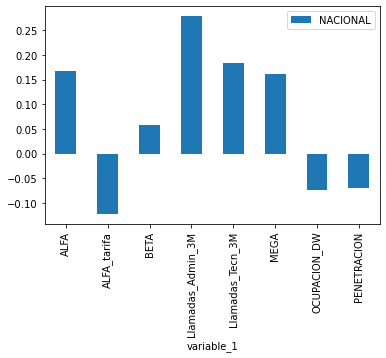

In [33]:
if conGraficos:
    RV_nal_c0.set_index('variable_1').plot.bar()

In [34]:
DataSetEntregable_totales=RV_nal_c0.copy()

In [35]:
DataSetEntregable_totales=DataSetEntregable_totales.set_index('variable_1').T

### Correlaciones x Periodo

### Funcion correlaciones por periodo
* Recibe los datos y retorna data framames para graficar

In [36]:
#(res_corr_total_raz_T, res_corr_total_var_T)=dic_corr_mes_ind(data_c0)
res_corr_total_raz_T=dic_corr_mes_ind(data_c0)

1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [37]:
res_corr_total_raz_T

variable_1,ALFA,ALFA_tarifa,BETA,Llamadas_Admin_3M,Llamadas_Tecn_3M,MEGA,OCUPACION_DW,PENETRACION
1,0.178604,-0.128402,0.027906,0.363058,0.199841,0.185917,-0.087918,-0.021752
2,0.213919,-0.163644,0.061466,0.378572,0.177449,0.216426,-0.079842,-0.033489
3,0.190586,-0.160303,0.083056,0.353992,0.161339,0.177192,-0.082154,-0.057641
4,0.151393,-0.112423,0.050437,0.327693,0.207386,0.145786,-0.080893,-0.093338
5,0.175321,-0.108271,0.055264,0.311787,0.22235,0.174871,-0.069885,-0.083078
6,0.188349,-0.139532,0.05326,0.3286,0.208321,0.188152,-0.086819,-0.096498
7,0.16422,-0.132975,0.028164,0.29851,0.192593,0.17704,-0.090337,-0.08059
8,0.153451,-0.108455,0.030176,0.311046,0.160735,0.165627,-0.046533,-0.06429
9,0.162352,-0.088261,0.015047,0.326703,0.153398,0.182862,-0.106994,-0.072148
10,0.135921,-0.037386,-0.009392,0.323196,0.215072,0.167085,-0.057719,-0.058484


In [38]:
DataSetEntregable_totales_temp=res_corr_total_raz_T.copy()

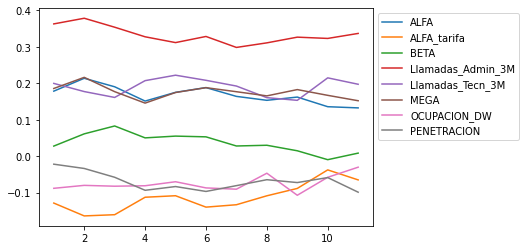

In [39]:
if conGraficos:
    ax = res_corr_total_raz_T.plot.line()
    ax.legend(bbox_to_anchor=(1.0, 1.0))
    ax.plot(figsize=(20,10));

### Analisis Específicos

In [40]:
#data=data_c0.merge(maestro_data, left_on=['COD_NODO'], right_on=['COD_NODO'], how='left')
data=data_c0.copy()

In [41]:
data.groupby('DIVISION')['CANT_USER'].sum().to_frame().sort_values('CANT_USER',ascending=False)

,CANT_USER
DIVISION,
REGION CENTRO,5354847
REGION OCCIDENTE,2275047
REGION NOROCCIDENTE,1868324
REGION ORIENTE,937699
REGION COSTA,478907


In [42]:
data.groupby('CIUDAD')['CANT_USER'].sum().to_frame().sort_values('CANT_USER',ascending=False).head(6)

,CANT_USER
CIUDAD,
BOGOTA,5226653
CALI,1374519
MEDELLIN,1048533
PEREIRA,357916
BARRANQUILLA,326084
BUCARAMANGA,316431


In [43]:
data[data['CIUDAD']=='BOGOTA'].groupby('AREA')['CANT_USER'].sum().to_frame().sort_values('CANT_USER',ascending=False).head(10)

,CANT_USER
AREA,
BOGOTA ORIENTE,1401972
BOGOTA NORTE,1350667
BOGOTA OCCIDENTE,1294491
BOGOTA SUR,1179523


### Analisis regionales

In [44]:
regionales=data['DIVISION'].unique()
regionales = [x for x in regionales if pd.notnull(x)]
regionales

['REGION COSTA',
 'REGION ORIENTE',
 'REGION CENTRO',
 'REGION NOROCCIDENTE',
 'REGION OCCIDENTE']

In [45]:
dic_resultados={}

In [46]:
for reg in regionales:
    print(reg)
    dic_aux={}
    data_aux=data[data['DIVISION']==reg]    
    corr_matrix = data_aux.select_dtypes(include=['float64', 'int','int64']).corr(method='spearman')
    corr_tab=tidy_corr_matrix(corr_matrix)
    corr_tab_bajas=corr_tab[corr_tab['variable_2']=='ind_churn'].drop(columns=['variable_2'])
    #corr_tab_bajas=corr_tab_bajas[~corr_tab_bajas['variable_1'].isin(['val_muestras_ok'])]
    
    dic_aux['total']=corr_tab_bajas
    
    #corr_tab_razones=corr_tab[corr_tab['variable_2'].isin(sel_variables_razones)]
    #corr_tab_razones=corr_tab_razones[~corr_tab_razones['variable_1'].isin(['BAJAS_TOTAL'])]
    #corr_tab_razones=corr_tab_razones[~corr_tab_razones['variable_2'].isin(['BAJAS_TOTAL'])]
    #corr_tab_razones=corr_tab_razones[corr_tab_razones['variable_2'].isin(sel_variables_razones)]
    #corr_tab_razones=corr_tab_razones[corr_tab_razones['variable_1'].isin(sel_variables_causas2)]    
    #dic_aux['razones']=corr_tab_razones
    dic_resultados[reg]=dic_aux

REGION COSTA
REGION ORIENTE
REGION CENTRO
REGION NOROCCIDENTE
REGION OCCIDENTE


In [47]:
#res_corr_total_var=res_corr_total_var_nacional
res_corr_total_raz=res_corr_total_raz_nacional
for reg in regionales:
    print(reg)
    #aux_tab_var=dic_resultados[reg]['total'][dic_resultados[reg]['total']['variable_1'].isin(sel_variables_razones)]
    aux_tab_sel=dic_resultados[reg]['total'][dic_resultados[reg]['total']['variable_1'].isin(sel_variables_causas2)]
    #aux_tab_var.drop(columns=['abs_r'],inplace=True)
    aux_tab_sel.drop(columns=['abs_r'],inplace=True)
    #aux_tab_var.columns=['variable_1',reg]
    aux_tab_sel.columns=['variable_1',reg]
    
    #res_corr_total_var=res_corr_total_var.merge(aux_tab_var,left_on='variable_1',right_on='variable_1', how='left')
    res_corr_total_raz=res_corr_total_raz.merge(aux_tab_sel,left_on='variable_1',right_on='variable_1', how='left')

REGION COSTA
REGION ORIENTE
REGION CENTRO
REGION NOROCCIDENTE
REGION OCCIDENTE


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [48]:
res_corr_total_raz_nacional

,variable_1,NACIONAL
1909,ALFA,0.167656
1958,ALFA_tarifa,-0.122380
2007,BETA,0.058686
2105,Llamadas_Admin_3M,0.277933
2154,Llamadas_Tecn_3M,0.183510
2203,MEGA,0.161953
2252,OCUPACION_DW,-0.074667
2301,PENETRACION,-0.070533


In [49]:
res_corr_total_raz_T=res_corr_total_raz.T
res_corr_total_raz_T.columns = res_corr_total_raz_T.iloc[0]
res_corr_total_raz_T = res_corr_total_raz_T.iloc[1:]

In [50]:
DataSetEntregable_totales=DataSetEntregable_totales.append(res_corr_total_raz_T[1:])
DataSetEntregable_totales

variable_1,ALFA,ALFA_tarifa,BETA,Llamadas_Admin_3M,Llamadas_Tecn_3M,MEGA,OCUPACION_DW,PENETRACION
NACIONAL,0.167656,-0.12238,0.058686,0.277933,0.18351,0.161953,-0.074667,-0.070533
REGION COSTA,0.163348,-0.130551,0.068963,0.358867,0.199119,0.141684,-0.090563,-0.105039
REGION ORIENTE,0.1461,-0.06461,0.047807,0.305736,0.171825,0.14067,-0.060968,-0.122524
REGION CENTRO,0.157532,-0.189551,0.071525,0.260008,0.19414,0.137587,-0.085065,-0.07139
REGION NOROCCIDENTE,0.086618,-0.069754,0.028591,0.302468,0.17994,0.088394,-0.042226,-0.032622
REGION OCCIDENTE,0.215726,-0.042294,0.058409,0.270528,0.166103,0.222206,-0.068402,-0.122394


In [51]:
DataSetEntregable_totales

variable_1,ALFA,ALFA_tarifa,BETA,Llamadas_Admin_3M,Llamadas_Tecn_3M,MEGA,OCUPACION_DW,PENETRACION
NACIONAL,0.167656,-0.12238,0.058686,0.277933,0.18351,0.161953,-0.074667,-0.070533
REGION COSTA,0.163348,-0.130551,0.068963,0.358867,0.199119,0.141684,-0.090563,-0.105039
REGION ORIENTE,0.1461,-0.06461,0.047807,0.305736,0.171825,0.14067,-0.060968,-0.122524
REGION CENTRO,0.157532,-0.189551,0.071525,0.260008,0.19414,0.137587,-0.085065,-0.07139
REGION NOROCCIDENTE,0.086618,-0.069754,0.028591,0.302468,0.17994,0.088394,-0.042226,-0.032622
REGION OCCIDENTE,0.215726,-0.042294,0.058409,0.270528,0.166103,0.222206,-0.068402,-0.122394


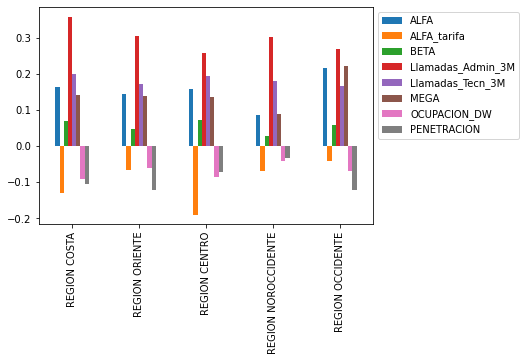

In [52]:
if conGraficos:
    ax = res_corr_total_raz_T[1:].plot.bar()
    ax.legend(bbox_to_anchor=(1.0, 1.0))
    ax.plot(figsize=(30,20));

### Analisis Temporal_ ESPECIFICO

In [53]:
## guardar en tabla
for reg in regionales:
    data_aux=data[data['DIVISION']==reg]    
    #(res_corr_total_raz_T, res_corr_total_var_T)=dic_corr_mes_ind(data_aux)
    res_corr_total_raz_T=dic_corr_mes_ind(data_aux)
    res_corr_total_raz_T['CATEGORIA']=reg
    DataSetEntregable_totales_temp=DataSetEntregable_totales_temp.append(res_corr_total_raz_T)

1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7

C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(



8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3

C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(



4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [54]:
DataSetEntregable_totales_temp['CATEGORIA']=DataSetEntregable_totales_temp['CATEGORIA'].fillna('NACIONAL')

In [55]:
DataSetEntregable_totales_temp

variable_1,ALFA,ALFA_tarifa,BETA,Llamadas_Admin_3M,Llamadas_Tecn_3M,MEGA,OCUPACION_DW,PENETRACION,CATEGORIA
1,0.178604,-0.128402,0.027906,0.363058,0.199841,0.185917,-0.087918,-0.021752,NACIONAL
2,0.213919,-0.163644,0.061466,0.378572,0.177449,0.216426,-0.079842,-0.033489,NACIONAL
3,0.190586,-0.160303,0.083056,0.353992,0.161339,0.177192,-0.082154,-0.057641,NACIONAL
4,0.151393,-0.112423,0.050437,0.327693,0.207386,0.145786,-0.080893,-0.093338,NACIONAL
5,0.175321,-0.108271,0.055264,0.311787,0.22235,0.174871,-0.069885,-0.083078,NACIONAL
...,...,...,...,...,...,...,...,...,...
7,0.172464,0.019692,0.008008,0.329696,0.176779,0.18732,-0.100746,-0.180683,REGION OCCIDENTE
8,0.274352,-0.07425,0.078155,0.297016,0.128466,0.295707,-0.067962,-0.121277,REGION OCCIDENTE
9,0.138604,-0.043664,0.010114,0.335731,0.156901,0.17546,-0.060424,-0.108517,REGION OCCIDENTE
10,0.179659,-0.043234,-0.015004,0.308416,0.179896,0.209843,-0.097006,-0.169319,REGION OCCIDENTE


## Ciudades

In [56]:
ciudades=data.groupby('CIUDAD')['CANT_USER'].sum().to_frame().sort_values('CANT_USER',ascending=False).head(6).index
ciudades

Index(['BOGOTA', 'CALI', 'MEDELLIN', 'PEREIRA', 'BARRANQUILLA', 'BUCARAMANGA'], dtype='object', name='CIUDAD')

In [57]:
dic_resultados_ciudad={}

In [58]:
for reg in ciudades:
    print(reg)
    dic_aux={}
    data_aux=data[data['CIUDAD']==reg]    
    corr_matrix = data_aux.select_dtypes(include=['float64', 'int','int64']).corr(method='spearman')
    corr_tab=tidy_corr_matrix(corr_matrix)
    corr_tab_bajas=corr_tab[corr_tab['variable_2']=='ind_churn'].drop(columns=['variable_2'])
    #corr_tab_bajas=corr_tab_bajas[~corr_tab_bajas['variable_1'].isin(['val_muestras_ok'])]
    
    dic_aux['total']=corr_tab_bajas
    
    #corr_tab_razones=corr_tab[corr_tab['variable_2'].isin(sel_variables_razones)]
    #corr_tab_razones=corr_tab_razones[~corr_tab_razones['variable_1'].isin(['BAJAS_TOTAL'])]
    #corr_tab_razones=corr_tab_razones[~corr_tab_razones['variable_2'].isin(['BAJAS_TOTAL'])]
    #corr_tab_razones=corr_tab_razones[corr_tab_razones['variable_2'].isin(sel_variables_razones)]
    #corr_tab_razones=corr_tab_razones[corr_tab_razones['variable_1'].isin(sel_variables_causas2)]
    
    #dic_aux['razones']=corr_tab_razones
    dic_resultados_ciudad[reg]=dic_aux

BOGOTA
CALI
MEDELLIN
PEREIRA
BARRANQUILLA
BUCARAMANGA


In [59]:
#res_corr_total_var=res_corr_total_var_nacional
res_corr_total_raz=res_corr_total_raz_nacional
for reg in ciudades:
    print(reg)
    #aux_tab_var=dic_resultados_ciudad[reg]['total'][dic_resultados_ciudad[reg]['total']['variable_1'].isin(sel_variables_razones)]
    aux_tab_sel=dic_resultados_ciudad[reg]['total'][dic_resultados_ciudad[reg]['total']['variable_1'].isin(sel_variables_causas2)]
    #aux_tab_var.drop(columns=['abs_r'],inplace=True)
    aux_tab_sel.drop(columns=['abs_r'],inplace=True)
    #aux_tab_var.columns=['variable_1',reg+'_r']
    aux_tab_sel.columns=['variable_1',reg]
    
    #res_corr_total_var=res_corr_total_var.merge(aux_tab_var,left_on='variable_1',right_on='variable_1', how='left')
    res_corr_total_raz=res_corr_total_raz.merge(aux_tab_sel,left_on='variable_1',right_on='variable_1', how='left')

BOGOTA
CALI
MEDELLIN
PEREIRA
BARRANQUILLA
BUCARAMANGA


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [60]:
res_corr_total_raz_T=res_corr_total_raz.T
res_corr_total_raz_T.columns = res_corr_total_raz_T.iloc[0]
res_corr_total_raz_T = res_corr_total_raz_T.iloc[1:]

In [61]:
res_corr_total_raz_T

variable_1,ALFA,ALFA_tarifa,BETA,Llamadas_Admin_3M,Llamadas_Tecn_3M,MEGA,OCUPACION_DW,PENETRACION
NACIONAL,0.167656,-0.12238,0.058686,0.277933,0.18351,0.161953,-0.074667,-0.070533
BOGOTA,0.15623,-0.189922,0.070613,0.259556,0.194777,0.136731,-0.084443,-0.066534
CALI,0.246777,-0.080294,0.040205,0.285556,0.155143,0.266131,-0.087382,-0.088557
MEDELLIN,0.118747,-0.082569,0.060276,0.355574,0.18406,0.103641,-0.093378,-0.125627
PEREIRA,0.003147,0.116133,-0.05328,0.234258,0.188841,0.059487,0.101032,0.099122
BARRANQUILLA,0.124629,-0.08089,0.047276,0.302609,0.17566,0.097192,-0.070395,-0.048416
BUCARAMANGA,0.053259,0.048467,0.046183,0.273724,0.186424,0.038637,-0.000012,-0.003489


In [62]:
DataSetEntregable_totales=DataSetEntregable_totales.append(res_corr_total_raz_T[1:])
DataSetEntregable_totales

variable_1,ALFA,ALFA_tarifa,BETA,Llamadas_Admin_3M,Llamadas_Tecn_3M,MEGA,OCUPACION_DW,PENETRACION
NACIONAL,0.167656,-0.12238,0.058686,0.277933,0.18351,0.161953,-0.074667,-0.070533
REGION COSTA,0.163348,-0.130551,0.068963,0.358867,0.199119,0.141684,-0.090563,-0.105039
REGION ORIENTE,0.1461,-0.06461,0.047807,0.305736,0.171825,0.14067,-0.060968,-0.122524
REGION CENTRO,0.157532,-0.189551,0.071525,0.260008,0.19414,0.137587,-0.085065,-0.07139
REGION NOROCCIDENTE,0.086618,-0.069754,0.028591,0.302468,0.17994,0.088394,-0.042226,-0.032622
REGION OCCIDENTE,0.215726,-0.042294,0.058409,0.270528,0.166103,0.222206,-0.068402,-0.122394
BOGOTA,0.15623,-0.189922,0.070613,0.259556,0.194777,0.136731,-0.084443,-0.066534
CALI,0.246777,-0.080294,0.040205,0.285556,0.155143,0.266131,-0.087382,-0.088557
MEDELLIN,0.118747,-0.082569,0.060276,0.355574,0.18406,0.103641,-0.093378,-0.125627
PEREIRA,0.003147,0.116133,-0.05328,0.234258,0.188841,0.059487,0.101032,0.099122


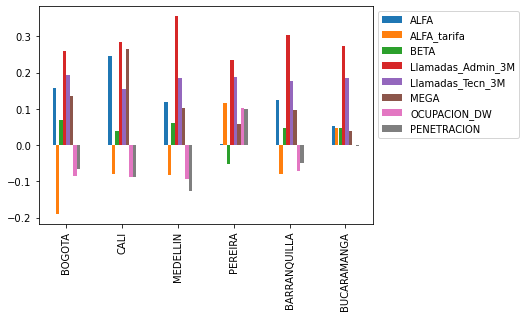

In [63]:
if conGraficos:
    ax = res_corr_total_raz_T[1:].plot.bar()
    ax.legend(bbox_to_anchor=(1.0, 1.0))
    ax.plot()

### Analisis temporal

In [64]:
## guardar en tabla
for reg in ciudades:
    data_aux=data[data['CIUDAD']==reg]      
    #(res_corr_total_raz_T, res_corr_total_var_T)=dic_corr_mes_ind(data_aux)
    res_corr_total_raz_T=dic_corr_mes_ind(data_aux)
    res_corr_total_raz_T['CATEGORIA']=reg
    DataSetEntregable_totales_temp=DataSetEntregable_totales_temp.append(res_corr_total_raz_T)

1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


11
1
2
3
4
5
6
7
8
9
10
11


In [65]:
DataSetEntregable_totales_temp

variable_1,ALFA,ALFA_tarifa,BETA,Llamadas_Admin_3M,Llamadas_Tecn_3M,MEGA,OCUPACION_DW,PENETRACION,CATEGORIA
1,0.178604,-0.128402,0.027906,0.363058,0.199841,0.185917,-0.087918,-0.021752,NACIONAL
2,0.213919,-0.163644,0.061466,0.378572,0.177449,0.216426,-0.079842,-0.033489,NACIONAL
3,0.190586,-0.160303,0.083056,0.353992,0.161339,0.177192,-0.082154,-0.057641,NACIONAL
4,0.151393,-0.112423,0.050437,0.327693,0.207386,0.145786,-0.080893,-0.093338,NACIONAL
5,0.175321,-0.108271,0.055264,0.311787,0.22235,0.174871,-0.069885,-0.083078,NACIONAL
...,...,...,...,...,...,...,...,...,...
7,0.055286,0.10036,-0.11177,0.307288,0.225111,0.156891,0.041614,0.159733,BUCARAMANGA
8,0.07567,0.05001,0.181363,0.288368,0.277903,-0.055507,-0.012322,-0.119677,BUCARAMANGA
9,0.100182,-0.124094,0.130229,0.222114,0.184565,0.014618,-0.052606,0.022339,BUCARAMANGA
10,-0.047604,0.105224,0.05624,0.339977,0.231639,-0.121761,-0.017733,0.211446,BUCARAMANGA


### Bogotá

In [66]:
sectoresBog=data[data['CIUDAD']=='BOGOTA']['AREA'].unique()

In [67]:
dic_resultados_Bogota={}

In [68]:
for reg in sectoresBog:
    print(reg)
    dic_aux={}
    data_aux=data[data['AREA']==reg]    
    corr_matrix = data_aux.select_dtypes(include=['float64', 'int','int64']).corr(method='spearman')
    corr_tab=tidy_corr_matrix(corr_matrix)
    corr_tab_bajas=corr_tab[corr_tab['variable_2']=='ind_churn'].drop(columns=['variable_2'])
    #corr_tab_bajas=corr_tab_bajas[~corr_tab_bajas['variable_1'].isin(['val_muestras_ok'])]
    
    dic_aux['total']=corr_tab_bajas
    
    #corr_tab_razones=corr_tab[corr_tab['variable_2'].isin(sel_variables_razones)]
    #corr_tab_razones=corr_tab_razones[~corr_tab_razones['variable_1'].isin(['BAJAS_TOTAL'])]
    #corr_tab_razones=corr_tab_razones[~corr_tab_razones['variable_2'].isin(['BAJAS_TOTAL'])]
    #corr_tab_razones=corr_tab_razones[corr_tab_razones['variable_2'].isin(sel_variables_razones)]
    #corr_tab_razones=corr_tab_razones[corr_tab_razones['variable_1'].isin(sel_variables_causas2)]
    
    #dic_aux['razones']=corr_tab_razones
    dic_resultados_Bogota[reg]=dic_aux

BOGOTA NORTE
BOGOTA ORIENTE
BOGOTA OCCIDENTE
BOGOTA SUR


In [69]:
#res_corr_total_var=res_corr_total_var_nacional
res_corr_total_raz=res_corr_total_raz_nacional
for reg in sectoresBog:
    print(reg)
    #aux_tab_var=dic_resultados_Bogota[reg]['total'][dic_resultados_Bogota[reg]['total']['variable_1'].isin(sel_variables_razones)]
    aux_tab_sel=dic_resultados_Bogota[reg]['total'][dic_resultados_Bogota[reg]['total']['variable_1'].isin(sel_variables_causas2)]
    #aux_tab_var.drop(columns=['abs_r'],inplace=True)
    aux_tab_sel.drop(columns=['abs_r'],inplace=True)
    #aux_tab_var.columns=['variable_1',reg+'_r']
    aux_tab_sel.columns=['variable_1',reg]
    
    #res_corr_total_var=res_corr_total_var.merge(aux_tab_var,left_on='variable_1',right_on='variable_1', how='left')
    res_corr_total_raz=res_corr_total_raz.merge(aux_tab_sel,left_on='variable_1',right_on='variable_1', how='left')

BOGOTA NORTE
BOGOTA ORIENTE
BOGOTA OCCIDENTE
BOGOTA SUR


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


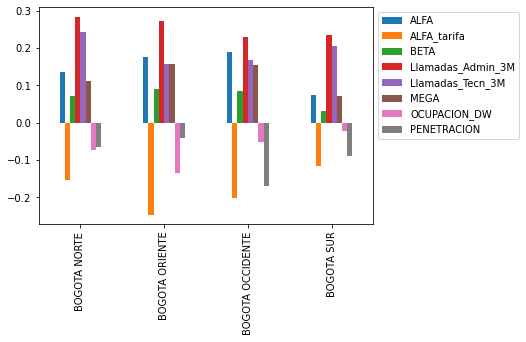

In [70]:
res_corr_total_raz_T=res_corr_total_raz.T
res_corr_total_raz_T.columns = res_corr_total_raz_T.iloc[0]
res_corr_total_raz_T = res_corr_total_raz_T.iloc[1:]
if conGraficos:    
    ax = res_corr_total_raz_T[1:].plot.bar()
    ax.legend(bbox_to_anchor=(1.0, 1.0))
    ax.plot()

In [71]:
res_corr_total_raz_T[1:]

variable_1,ALFA,ALFA_tarifa,BETA,Llamadas_Admin_3M,Llamadas_Tecn_3M,MEGA,OCUPACION_DW,PENETRACION
BOGOTA NORTE,0.137179,-0.154881,0.070418,0.283951,0.244386,0.111952,-0.072455,-0.066292
BOGOTA ORIENTE,0.17541,-0.24648,0.089262,0.273588,0.158436,0.156454,-0.135734,-0.0417
BOGOTA OCCIDENTE,0.190844,-0.201578,0.085915,0.228948,0.167867,0.155438,-0.05303,-0.171098
BOGOTA SUR,0.073998,-0.117379,0.032425,0.236444,0.205625,0.070345,-0.021542,-0.088777


In [72]:
DataSetEntregable_totales=DataSetEntregable_totales.append(res_corr_total_raz_T[1:])
DataSetEntregable_totales

variable_1,ALFA,ALFA_tarifa,BETA,Llamadas_Admin_3M,Llamadas_Tecn_3M,MEGA,OCUPACION_DW,PENETRACION
NACIONAL,0.167656,-0.12238,0.058686,0.277933,0.18351,0.161953,-0.074667,-0.070533
REGION COSTA,0.163348,-0.130551,0.068963,0.358867,0.199119,0.141684,-0.090563,-0.105039
REGION ORIENTE,0.1461,-0.06461,0.047807,0.305736,0.171825,0.14067,-0.060968,-0.122524
REGION CENTRO,0.157532,-0.189551,0.071525,0.260008,0.19414,0.137587,-0.085065,-0.07139
REGION NOROCCIDENTE,0.086618,-0.069754,0.028591,0.302468,0.17994,0.088394,-0.042226,-0.032622
REGION OCCIDENTE,0.215726,-0.042294,0.058409,0.270528,0.166103,0.222206,-0.068402,-0.122394
BOGOTA,0.15623,-0.189922,0.070613,0.259556,0.194777,0.136731,-0.084443,-0.066534
CALI,0.246777,-0.080294,0.040205,0.285556,0.155143,0.266131,-0.087382,-0.088557
MEDELLIN,0.118747,-0.082569,0.060276,0.355574,0.18406,0.103641,-0.093378,-0.125627
PEREIRA,0.003147,0.116133,-0.05328,0.234258,0.188841,0.059487,0.101032,0.099122


### Resultado Atemporal

In [73]:
### Guardar Archivo
##DataSetEntregable_totales.to_csv('CorrelacionesAgrupadas_14Dic.csv',sep=';')

### Temporales

In [74]:
## guardar en tabla
for reg in sectoresBog:
    data_aux=data[data['AREA']==reg]      
    #(res_corr_total_raz_T, res_corr_total_var_T)=dic_corr_mes_ind(data_aux)
    res_corr_total_raz_T=dic_corr_mes_ind(data_aux)
    res_corr_total_raz_T['CATEGORIA']=reg
    DataSetEntregable_totales_temp=DataSetEntregable_totales_temp.append(res_corr_total_raz_T)

1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


## Resulado Temporal

In [75]:
#DataSetEntregable_totales_temp.to_csv('CorrelacionesTemporales_14Dic.csv',sep=';')

# Regresión multilineal

* Reescalado
* Modelos

In [76]:
DataSetEntregable_totales_reg=pd.DataFrame()
DataSetEntregable_totales_temp_reg=pd.DataFrame()

In [77]:
data_reg=data_c0.copy()

In [78]:
sel_variables_causas2

['ALFA_tarifa',
 'ALFA',
 'BETA',
 'MEGA',
 'Llamadas_Admin_3M',
 'Llamadas_Tecn_3M',
 'PENETRACION',
 'OCUPACION_DW']

In [79]:
data_reg.set_index('COD_NODO',inplace=True)

In [80]:
data_reg=data_reg[sel_variables_causas2+['ind_churn','FECHA']]

In [81]:
data_reg.isnull().sum()/len(data_reg)

ALFA_tarifa          0.010392
ALFA                 0.001745
BETA                 0.000476
MEGA                 0.001296
Llamadas_Admin_3M    0.000000
Llamadas_Tecn_3M     0.000000
PENETRACION          0.000000
OCUPACION_DW         0.000370
ind_churn            0.000000
FECHA                0.000000
dtype: float64

In [82]:
data_reg=data_reg.dropna()

In [83]:
colums_reg=list(data_reg.columns)

In [84]:
colums_reg.remove('FECHA')

In [85]:
colums_reg

['ALFA_tarifa',
 'ALFA',
 'BETA',
 'MEGA',
 'Llamadas_Admin_3M',
 'Llamadas_Tecn_3M',
 'PENETRACION',
 'OCUPACION_DW',
 'ind_churn']

In [86]:
#for col in colums_reg:
#    data_reg[col]=np.log1p(data_reg[col])

In [87]:
## Escalar
#cols=data_reg.columns
scaler = MinMaxScaler()
data_reg[colums_reg]= scaler.fit_transform(data_reg[colums_reg])

In [88]:
colums_reg.remove('ind_churn')

In [89]:
colums_reg

['ALFA_tarifa',
 'ALFA',
 'BETA',
 'MEGA',
 'Llamadas_Admin_3M',
 'Llamadas_Tecn_3M',
 'PENETRACION',
 'OCUPACION_DW']

### Seleccion Variables Significativas

In [90]:
reg_nal=iter_regresion(data_reg)
reg_nal

1
      coefs        pvalues           Features    VIF
0 -0.017476   2.620742e-38        ALFA_tarifa   7.70
1  0.008865   4.548080e-02               ALFA  21.55
2  0.009765   4.601158e-03               BETA  13.26
3  0.023170   4.719357e-15               MEGA  17.89
4  0.050608  6.047356e-276  Llamadas_Admin_3M   5.22
5  0.011472   1.115934e-14   Llamadas_Tecn_3M   1.89
6 -0.029388   2.094986e-92        PENETRACION   8.14
7 -0.013241   5.090041e-22       OCUPACION_DW  11.10
      coefs   pvalues Features    VIF
1  0.008865  0.045481     ALFA  21.55


,coefs,pvalues,Features,VIF
0,-0.017476,2.620742e-38,ALFA_tarifa,7.70
1,0.008865,4.548080e-02,ALFA,21.55
2,0.009765,4.601158e-03,BETA,13.26
3,0.023170,4.719357e-15,MEGA,17.89
4,0.050608,6.047356e-276,Llamadas_Admin_3M,5.22
5,0.011472,1.115934e-14,Llamadas_Tecn_3M,1.89
6,-0.029388,2.094986e-92,PENETRACION,8.14
7,-0.013241,5.090041e-22,OCUPACION_DW,11.10


In [91]:
colums_reg=list(reg_nal['Features'])
colums_reg

['ALFA_tarifa',
 'ALFA',
 'BETA',
 'MEGA',
 'Llamadas_Admin_3M',
 'Llamadas_Tecn_3M',
 'PENETRACION',
 'OCUPACION_DW']

### Nacional

In [92]:
# Dividir en X y X
y_train = data_reg['ind_churn']
X_train =  data_reg[colums_reg]

In [93]:
#Modelos
X_train_lm = sm.add_constant(X_train)
lr_1 = sm.OLS(y_train, X_train_lm).fit()
lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              ind_churn   R-squared:                       0.087
Model:                            OLS   Adj. R-squared:                  0.087
Method:                 Least Squares   F-statistic:                     443.4
Date:                Fri, 24 Dec 2021   Prob (F-statistic):               0.00
Time:                        13:24:05   Log-Likelihood:                 64775.
No. Observations:               37351   AIC:                        -1.295e+05
Df Residuals:                   37342   BIC:                        -1.295e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0688      0.002     41.005      0.000       0.066       0.072
ALFA_tarifa          -0.0175      0.001    -12.956      0.000      -0.020      -0.015
ALFA                  0.0089      0.004      2.000      0.045       0.000       0.018
BETA                  0.0098      0.003      2.834      0.005       0.003       0.017
MEGA                  0.0232      0.003      7.837      0.000       0.017       0.029
Llamadas_Admin_3M     0.0506      0.001     35.796      0.000       0.048       0.053
Llamadas_Tecn_3M      0.0115      0.001      7.728      0.000       0.009       0.014
PENETRACION          -0.0294      0.001    -20.446      0.000      -0.032      -0.027
OCUPACION_DW         -0.0132      0.001     -9.653      0.000      -0.016      -0.011
==============================================================================
Omnibus:                    22148.955   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           661481.207
Skew:                           2.335   Prob(JB):                         0.00
Kurtosis:                      23.081   Cond. No.                         40.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [94]:
# Cálculo VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,ALFA,21.55
3,MEGA,17.89
2,BETA,13.26
7,OCUPACION_DW,11.10
6,PENETRACION,8.14
0,ALFA_tarifa,7.70
4,Llamadas_Admin_3M,5.22
5,Llamadas_Tecn_3M,1.89


In [95]:
df_coef_nal=lr_1.params.to_frame()
df_coef_nal.columns=['coefs']

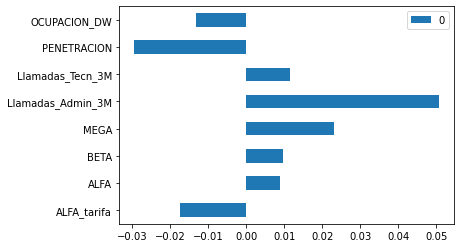

In [96]:
if conGraficos:
    lr_1.params.to_frame()[1:].plot.barh()

In [97]:
df_coef_nal

,coefs
const,0.068822
ALFA_tarifa,-0.017476
ALFA,0.008865
BETA,0.009765
MEGA,0.023170
Llamadas_Admin_3M,0.050608
Llamadas_Tecn_3M,0.011472
PENETRACION,-0.029388
OCUPACION_DW,-0.013241


In [98]:
df_vif_nal=vif

In [99]:
DataSetEntregable_totales_reg=df_coef_nal.copy()

In [100]:
DataSetEntregable_totales_reg=DataSetEntregable_totales_reg[1:].T
DataSetEntregable_totales_reg

,ALFA_tarifa,ALFA,BETA,MEGA,Llamadas_Admin_3M,Llamadas_Tecn_3M,PENETRACION,OCUPACION_DW
coefs,-0.017476,0.008865,0.009765,0.02317,0.050608,0.011472,-0.029388,-0.013241


In [101]:
DataSetEntregable_totales_reg['index']='NACIONAL'
DataSetEntregable_totales_reg.set_index('index',inplace=True)
DataSetEntregable_totales_reg

,ALFA_tarifa,ALFA,BETA,MEGA,Llamadas_Admin_3M,Llamadas_Tecn_3M,PENETRACION,OCUPACION_DW
index,,,,,,,,
NACIONAL,-0.017476,0.008865,0.009765,0.02317,0.050608,0.011472,-0.029388,-0.013241


## Regresión en el tiempo

In [102]:
data_reg

,ALFA_tarifa,ALFA,BETA,MEGA,Llamadas_Admin_3M,Llamadas_Tecn_3M,PENETRACION,OCUPACION_DW,ind_churn,FECHA
COD_NODO,,,,,,,,,,
RO4,0.458236,0.271867,0.262215,0.409993,0.237559,0.366667,0.377825,0.699387,0.021177,7
KRI,0.597923,0.157288,0.298927,0.210794,0.280349,0.047619,0.322749,0.359557,0.045029,7
5B6022,0.454115,0.273062,0.148336,0.673514,0.801167,0.891892,0.620189,0.448781,0.126437,3
GIA,0.474593,0.037443,0.267557,0.055455,0.116197,0.000000,0.308594,0.397254,0.054149,7
1601,0.485602,0.324489,0.153394,0.778385,0.344288,0.055556,0.594435,0.642779,0.033951,6
...,...,...,...,...,...,...,...,...,...,...
S04,0.489771,0.445353,0.323249,0.555857,0.469953,0.150000,0.428689,0.336555,0.087600,11
LOM2,0.718743,0.093666,0.276749,0.134580,0.309859,0.166667,0.366866,0.787987,0.040936,3
472D,0.442057,0.261775,0.149482,0.641569,0.335681,0.000000,0.724543,0.440992,0.065476,4


In [103]:
(df_coef, df_vif)=dic_reg_mes_ind(data_reg)

C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

1
2
3
4
5
6
7
8
9
10
11


In [104]:
df_coef

,coefs,1,2,3,4,5,6,7,8,9,10,11
const,0.068822,0.061022,0.054943,0.060914,0.050864,0.068711,0.071948,0.081046,0.062983,0.067292,0.061826,0.054131
ALFA_tarifa,-0.017476,-0.011401,-0.021567,-0.021590,-0.013157,-0.010143,-0.017961,-0.017261,-0.008154,-0.003150,0.010869,0.001841
ALFA,0.008865,-0.004138,0.031050,0.032400,-0.036399,0.018068,0.007478,0.017532,0.005721,0.010917,0.003787,0.046695
BETA,0.009765,0.015219,-0.008886,0.003399,0.047913,-0.004311,0.004324,-0.001526,0.000450,-0.006605,-0.010645,-0.034314
MEGA,0.023170,0.040031,0.017460,0.008272,0.054916,0.026079,0.027856,0.019066,0.031745,0.024332,0.030564,0.001042
Llamadas_Admin_3M,0.050608,0.051113,0.062302,0.062809,0.061400,0.056956,0.064369,0.059768,0.077659,0.071990,0.076510,0.070060
Llamadas_Tecn_3M,0.011472,0.011923,0.007288,0.002431,0.011705,0.013154,0.012022,0.018251,-0.001379,0.002049,0.018610,0.013162
PENETRACION,-0.029388,-0.026071,-0.023751,-0.031399,-0.034787,-0.035471,-0.034787,-0.034812,-0.027749,-0.024787,-0.027853,-0.030968
OCUPACION_DW,-0.013241,-0.019483,-0.012510,-0.014982,-0.014411,-0.017043,-0.019663,-0.019842,-0.009242,-0.015139,-0.015205,0.001337


In [105]:
df_coef_T=df_coef.T
df_coef_T.pop('const')
df_coef_T=df_coef_T[1:]
df_coef_T

,ALFA_tarifa,ALFA,BETA,MEGA,Llamadas_Admin_3M,Llamadas_Tecn_3M,PENETRACION,OCUPACION_DW
1,-0.011401,-0.004138,0.015219,0.040031,0.051113,0.011923,-0.026071,-0.019483
2,-0.021567,0.031050,-0.008886,0.017460,0.062302,0.007288,-0.023751,-0.012510
3,-0.021590,0.032400,0.003399,0.008272,0.062809,0.002431,-0.031399,-0.014982
4,-0.013157,-0.036399,0.047913,0.054916,0.061400,0.011705,-0.034787,-0.014411
5,-0.010143,0.018068,-0.004311,0.026079,0.056956,0.013154,-0.035471,-0.017043
6,-0.017961,0.007478,0.004324,0.027856,0.064369,0.012022,-0.034787,-0.019663
7,-0.017261,0.017532,-0.001526,0.019066,0.059768,0.018251,-0.034812,-0.019842
8,-0.008154,0.005721,0.000450,0.031745,0.077659,-0.001379,-0.027749,-0.009242
9,-0.003150,0.010917,-0.006605,0.024332,0.071990,0.002049,-0.024787,-0.015139
10,0.010869,0.003787,-0.010645,0.030564,0.076510,0.018610,-0.027853,-0.015205


In [106]:
DataSetEntregable_totales_temp_reg=df_coef_T.copy()

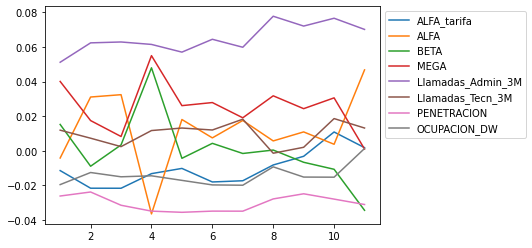

In [107]:
if conGraficos:
    ax = df_coef_T.plot.line()
    ax.legend(bbox_to_anchor=(1.0, 1.0))
    ax.plot(figsize=(20,10));

## Analisis Específicos

In [108]:
data_reg

,ALFA_tarifa,ALFA,BETA,MEGA,Llamadas_Admin_3M,Llamadas_Tecn_3M,PENETRACION,OCUPACION_DW,ind_churn,FECHA
COD_NODO,,,,,,,,,,
RO4,0.458236,0.271867,0.262215,0.409993,0.237559,0.366667,0.377825,0.699387,0.021177,7
KRI,0.597923,0.157288,0.298927,0.210794,0.280349,0.047619,0.322749,0.359557,0.045029,7
5B6022,0.454115,0.273062,0.148336,0.673514,0.801167,0.891892,0.620189,0.448781,0.126437,3
GIA,0.474593,0.037443,0.267557,0.055455,0.116197,0.000000,0.308594,0.397254,0.054149,7
1601,0.485602,0.324489,0.153394,0.778385,0.344288,0.055556,0.594435,0.642779,0.033951,6
...,...,...,...,...,...,...,...,...,...,...
S04,0.489771,0.445353,0.323249,0.555857,0.469953,0.150000,0.428689,0.336555,0.087600,11
LOM2,0.718743,0.093666,0.276749,0.134580,0.309859,0.166667,0.366866,0.787987,0.040936,3
472D,0.442057,0.261775,0.149482,0.641569,0.335681,0.000000,0.724543,0.440992,0.065476,4


In [109]:
data_reg_nor=data_reg.copy()

In [110]:
data_reg_nor=data_reg_nor.merge(maestro_data, left_index=True, right_on=['COD_NODO'], how='left')
data_reg_nor.set_index('COD_NODO', inplace=True)

In [111]:
data_reg_nor_temp=data_reg_nor.copy()

In [112]:
data_reg_nor.pop('FECHA')

COD_NODO
RO4        7
KRI        7
5B6022     3
GIA        7
1601       6
          ..
S04       11
LOM2       3
472D       4
ACB       11
E3Z        5
Name: FECHA, Length: 38920, dtype: int64

## Regional

In [113]:
dic_resultados_reg={}

In [114]:
for reg in regionales:
    print(reg)
    dic_aux={}    
    data_aux=data_reg_nor[data_reg_nor['DIVISION']==reg] 
    data_aux=data_aux.select_dtypes(include=['float64', 'int','int64'])
    
    y_train = data_aux.pop('ind_churn')
    X_train = data_aux[colums_reg]    
    #Modelos
    X_train_lm = sm.add_constant(X_train)
    lr_1 = sm.OLS(y_train, X_train_lm).fit()    
    dic_aux['coef']=lr_1.params.to_frame()
    dic_aux['coef'].columns=['coefs']
    # Cálculo VIFs
    vif = pd.DataFrame()
    vif['Features'] = X_train.columns
    vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    dic_aux['vif']=vif
    dic_resultados[reg]=dic_aux

REGION COSTA
REGION ORIENTE
REGION CENTRO
REGION NOROCCIDENTE
REGION OCCIDENTE


In [115]:
df_coef=df_coef_nal
df_vif=df_vif_nal
for reg in regionales:
    print(reg)
    
    aux_tab_coef=dic_resultados[reg]['coef']
    aux_tab_vif=dic_resultados[reg]['vif']
    
    #aux_tab_coef.columns=[reg+'_coef']
    aux_tab_coef.columns=[reg]
    #aux_tab_vif.columns=['Features',reg+'_vif']
    aux_tab_vif.columns=['Features',reg]
    
    df_coef=df_coef.merge(aux_tab_coef,left_index=True,right_index=True, how='left')
    df_vif=df_vif.merge(aux_tab_vif,left_on='Features',right_on='Features', how='left')

REGION COSTA
REGION ORIENTE
REGION CENTRO
REGION NOROCCIDENTE
REGION OCCIDENTE


In [116]:
df_coef_T=df_coef.T
df_coef_T=df_coef_T.drop(columns=['const'])

In [117]:
df_coef_T

,ALFA_tarifa,ALFA,BETA,MEGA,Llamadas_Admin_3M,Llamadas_Tecn_3M,PENETRACION,OCUPACION_DW
coefs,-0.017476,0.008865,0.009765,0.023170,0.050608,0.011472,-0.029388,-0.013241
REGION COSTA,-0.019757,0.042046,-0.023846,-0.020725,0.075508,0.010354,-0.033697,-0.024475
REGION ORIENTE,-0.009202,0.009294,0.007034,0.013485,0.064914,0.014684,-0.033816,-0.006814
REGION CENTRO,-0.038683,0.005599,0.014219,0.009612,0.047440,0.015224,-0.028086,-0.015988
REGION NOROCCIDENTE,-0.015793,0.048529,-0.009022,0.019453,0.055411,0.012476,-0.012460,-0.014953
REGION OCCIDENTE,0.007709,-0.006447,0.022759,0.064162,0.046599,0.006247,-0.033902,-0.001214


In [118]:
DataSetEntregable_totales_reg=DataSetEntregable_totales_reg.append(df_coef_T[1:])
DataSetEntregable_totales_reg

,ALFA_tarifa,ALFA,BETA,MEGA,Llamadas_Admin_3M,Llamadas_Tecn_3M,PENETRACION,OCUPACION_DW
NACIONAL,-0.017476,0.008865,0.009765,0.023170,0.050608,0.011472,-0.029388,-0.013241
REGION COSTA,-0.019757,0.042046,-0.023846,-0.020725,0.075508,0.010354,-0.033697,-0.024475
REGION ORIENTE,-0.009202,0.009294,0.007034,0.013485,0.064914,0.014684,-0.033816,-0.006814
REGION CENTRO,-0.038683,0.005599,0.014219,0.009612,0.047440,0.015224,-0.028086,-0.015988
REGION NOROCCIDENTE,-0.015793,0.048529,-0.009022,0.019453,0.055411,0.012476,-0.012460,-0.014953
REGION OCCIDENTE,0.007709,-0.006447,0.022759,0.064162,0.046599,0.006247,-0.033902,-0.001214


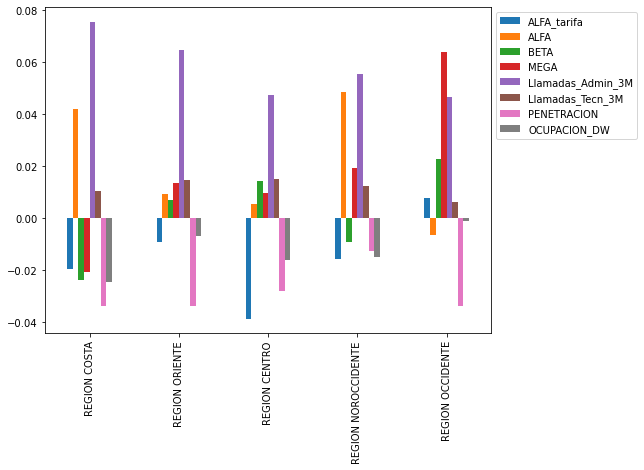

In [119]:
if conGraficos:
    ax = df_coef_T[1:].plot.bar(figsize=(8, 6))
    ax.legend(bbox_to_anchor=(1.0, 1.0))
    ax.plot(figsize=(20,10));

####  Analisis temporal

In [120]:
for reg in regionales:
    data_aux=data_reg_nor_temp[data_reg_nor_temp['DIVISION']==reg] 
    data_aux=data_aux.select_dtypes(include=['float64', 'int','int64'])
    (df_coef, df_vif)=dic_reg_mes_ind(data_aux)
    df_coef_T=df_coef.T
    df_coef_T.pop('const')
    df_coef_T=df_coef_T[1:]
    df_coef_T['CATEGORIA']=reg
    DataSetEntregable_totales_temp_reg=DataSetEntregable_totales_temp_reg.append(df_coef_T)    

C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6

C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a


7
8
9
10
11
1
2
3
4


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

5
6
7
8
9
10
11
1
2
3
4
5
6
7
8

C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a


9
10
11
1
2
3
4
5
6
7
8
9
10
11


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [121]:
DataSetEntregable_totales_temp_reg['CATEGORIA']=DataSetEntregable_totales_temp_reg['CATEGORIA'].fillna('NACIONAL')

In [122]:
DataSetEntregable_totales_temp_reg

,ALFA_tarifa,ALFA,BETA,MEGA,Llamadas_Admin_3M,Llamadas_Tecn_3M,PENETRACION,OCUPACION_DW,CATEGORIA
1,-0.011401,-0.004138,0.015219,0.040031,0.051113,0.011923,-0.026071,-0.019483,NACIONAL
2,-0.021567,0.031050,-0.008886,0.017460,0.062302,0.007288,-0.023751,-0.012510,NACIONAL
3,-0.021590,0.032400,0.003399,0.008272,0.062809,0.002431,-0.031399,-0.014982,NACIONAL
4,-0.013157,-0.036399,0.047913,0.054916,0.061400,0.011705,-0.034787,-0.014411,NACIONAL
5,-0.010143,0.018068,-0.004311,0.026079,0.056956,0.013154,-0.035471,-0.017043,NACIONAL
...,...,...,...,...,...,...,...,...,...
7,0.038091,0.070825,-0.025937,0.013783,0.084639,0.026967,-0.044073,-0.012438,REGION OCCIDENTE
8,0.011028,-0.025394,0.020229,0.097522,0.091476,-0.003330,-0.065704,-0.008180,REGION OCCIDENTE
9,0.002834,0.043948,-0.021330,0.013152,0.080230,-0.011807,-0.015282,-0.011231,REGION OCCIDENTE
10,0.018770,-0.026401,0.009410,0.067930,0.051616,0.021905,-0.039028,-0.025024,REGION OCCIDENTE


## Ciudades

In [123]:
dic_resultados_ciudad_reg={}
for reg in ciudades:
    print(reg)
    dic_aux={}    
    data_aux=data_reg_nor[data_reg_nor['CIUDAD']==reg] 
    data_aux=data_aux.select_dtypes(include=['float64', 'int','int64'])
    
    if len(data_aux)>0:
        y_train = data_aux.pop('ind_churn')
        X_train = data_aux[colums_reg]   

        #Modelos
        X_train_lm = sm.add_constant(X_train)
        lr_1 = sm.OLS(y_train, X_train_lm).fit()    
        dic_aux['coef']=lr_1.params.to_frame()
        dic_aux['coef'].columns=['coefs']
        # Cálculo VIFs
        vif = pd.DataFrame()
        vif['Features'] = X_train.columns
        vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
        vif['VIF'] = round(vif['VIF'], 2)
        vif = vif.sort_values(by = "VIF", ascending = False)
        dic_aux['vif']=vif
        dic_resultados_ciudad_reg[reg]=dic_aux

BOGOTA
CALI
MEDELLIN
PEREIRA
BARRANQUILLA
BUCARAMANGA


In [124]:
df_coef=df_coef_nal
df_vif=df_vif_nal
for reg in dic_resultados_ciudad_reg:
    print(reg)    
    aux_tab_coef=dic_resultados_ciudad_reg[reg]['coef']
    aux_tab_vif=dic_resultados_ciudad_reg[reg]['vif']
    
    #aux_tab_coef.columns=[reg+'_coef']
    aux_tab_coef.columns=[reg]
    #aux_tab_vif.columns=['Features',reg+'_vif']
    aux_tab_vif.columns=['Features',reg]
    
    df_coef=df_coef.merge(aux_tab_coef,left_index=True,right_index=True, how='left')
    df_vif=df_vif.merge(aux_tab_vif,left_on='Features',right_on='Features', how='left')

BOGOTA
CALI
MEDELLIN
PEREIRA
BARRANQUILLA
BUCARAMANGA


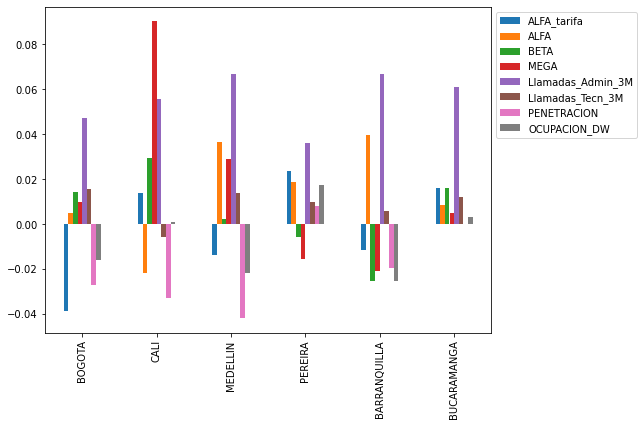

In [125]:
df_coef_T=df_coef.T
df_coef_T=df_coef_T.drop(columns=['const'])
if conGraficos:
    ax = df_coef_T[1:].plot.bar(figsize=(8, 6))
    ax.legend(bbox_to_anchor=(1.0, 1.0))
    ax.plot(figsize=(20,10));

In [126]:
df_coef_T[1:]

,ALFA_tarifa,ALFA,BETA,MEGA,Llamadas_Admin_3M,Llamadas_Tecn_3M,PENETRACION,OCUPACION_DW
BOGOTA,-0.038841,0.004814,0.014322,0.009913,0.047286,0.015618,-0.027427,-0.016063
CALI,0.013708,-0.021764,0.029499,0.090237,0.055866,-0.005739,-0.033183,0.000876
MEDELLIN,-0.013751,0.036643,0.002046,0.028993,0.067036,0.013872,-0.041908,-0.021973
PEREIRA,0.023559,0.018781,-0.005962,-0.015835,0.036265,0.009729,0.008085,0.017206
BARRANQUILLA,-0.011817,0.039835,-0.025304,-0.020794,0.066977,0.005911,-0.019581,-0.025363
BUCARAMANGA,0.016065,0.008457,0.016004,0.004829,0.061211,0.011870,-0.000237,0.003171


In [127]:
DataSetEntregable_totales_reg=DataSetEntregable_totales_reg.append(df_coef_T[1:])
DataSetEntregable_totales_reg

,ALFA_tarifa,ALFA,BETA,MEGA,Llamadas_Admin_3M,Llamadas_Tecn_3M,PENETRACION,OCUPACION_DW
NACIONAL,-0.017476,0.008865,0.009765,0.023170,0.050608,0.011472,-0.029388,-0.013241
REGION COSTA,-0.019757,0.042046,-0.023846,-0.020725,0.075508,0.010354,-0.033697,-0.024475
REGION ORIENTE,-0.009202,0.009294,0.007034,0.013485,0.064914,0.014684,-0.033816,-0.006814
REGION CENTRO,-0.038683,0.005599,0.014219,0.009612,0.047440,0.015224,-0.028086,-0.015988
REGION NOROCCIDENTE,-0.015793,0.048529,-0.009022,0.019453,0.055411,0.012476,-0.012460,-0.014953
REGION OCCIDENTE,0.007709,-0.006447,0.022759,0.064162,0.046599,0.006247,-0.033902,-0.001214
BOGOTA,-0.038841,0.004814,0.014322,0.009913,0.047286,0.015618,-0.027427,-0.016063
CALI,0.013708,-0.021764,0.029499,0.090237,0.055866,-0.005739,-0.033183,0.000876
MEDELLIN,-0.013751,0.036643,0.002046,0.028993,0.067036,0.013872,-0.041908,-0.021973
PEREIRA,0.023559,0.018781,-0.005962,-0.015835,0.036265,0.009729,0.008085,0.017206


#### Analisis temporal

In [128]:
for reg in ciudades:
    data_aux=data_reg_nor_temp[data_reg_nor_temp['CIUDAD']==reg]
    data_aux=data_aux.select_dtypes(include=['float64', 'int','int64'])
    (df_coef, df_vif)=dic_reg_mes_ind(data_aux)
    df_coef_T=df_coef.T
    df_coef_T.pop('const')
    df_coef_T=df_coef_T[1:]
    df_coef_T['CATEGORIA']=reg
    DataSetEntregable_totales_temp_reg=DataSetEntregable_totales_temp_reg.append(df_coef_T)

C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

In [129]:
DataSetEntregable_totales_temp_reg

,ALFA_tarifa,ALFA,BETA,MEGA,Llamadas_Admin_3M,Llamadas_Tecn_3M,PENETRACION,OCUPACION_DW,CATEGORIA
1,-0.011401,-0.004138,0.015219,0.040031,0.051113,0.011923,-0.026071,-0.019483,NACIONAL
2,-0.021567,0.031050,-0.008886,0.017460,0.062302,0.007288,-0.023751,-0.012510,NACIONAL
3,-0.021590,0.032400,0.003399,0.008272,0.062809,0.002431,-0.031399,-0.014982,NACIONAL
4,-0.013157,-0.036399,0.047913,0.054916,0.061400,0.011705,-0.034787,-0.014411,NACIONAL
5,-0.010143,0.018068,-0.004311,0.026079,0.056956,0.013154,-0.035471,-0.017043,NACIONAL
...,...,...,...,...,...,...,...,...,...
7,0.052820,0.133639,-0.116464,-0.054221,0.106665,0.008697,0.027247,0.001508,BUCARAMANGA
8,0.049138,-0.196025,0.179128,0.108214,0.068798,0.072344,-0.054317,-0.007417,BUCARAMANGA
9,-0.044214,0.037793,0.004840,-0.022432,0.017983,0.048386,0.036067,-0.001413,BUCARAMANGA
10,0.061222,0.130735,-0.105217,-0.115604,0.065292,0.033940,0.043843,-0.016540,BUCARAMANGA


## Bogota

In [130]:
dic_resultados_Bogota={}
for reg in sectoresBog:
    print(reg)
    dic_aux={}    
    data_aux=data_reg_nor[data_reg_nor['AREA']==reg] 
    data_aux=data_aux.select_dtypes(include=['float64', 'int','int64'])
    
    if len(data_aux)>0:
        y_train = data_aux.pop('ind_churn')
        X_train = data_aux[colums_reg]   

        #Modelos
        X_train_lm = sm.add_constant(X_train)
        lr_1 = sm.OLS(y_train, X_train_lm).fit()    
        dic_aux['coef']=lr_1.params.to_frame()
        dic_aux['coef'].columns=['coefs']
        # Cálculo VIFs
        vif = pd.DataFrame()
        vif['Features'] = X_train.columns
        vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
        vif['VIF'] = round(vif['VIF'], 2)
        vif = vif.sort_values(by = "VIF", ascending = False)
        dic_aux['vif']=vif
        dic_resultados_Bogota[reg]=dic_aux

BOGOTA NORTE
BOGOTA ORIENTE
BOGOTA OCCIDENTE
BOGOTA SUR


In [131]:
df_coef=df_coef_nal
df_vif=df_vif_nal
for reg in dic_resultados_Bogota:
    print(reg)    
    aux_tab_coef=dic_resultados_Bogota[reg]['coef']
    aux_tab_vif=dic_resultados_Bogota[reg]['vif']
    
    #aux_tab_coef.columns=[reg+'_coef']
    aux_tab_coef.columns=[reg]
    #aux_tab_vif.columns=['Features',reg+'_vif']
    aux_tab_vif.columns=['Features',reg]
    
    df_coef=df_coef.merge(aux_tab_coef,left_index=True,right_index=True, how='left')
    df_vif=df_vif.merge(aux_tab_vif,left_on='Features',right_on='Features', how='left')

BOGOTA NORTE
BOGOTA ORIENTE
BOGOTA OCCIDENTE
BOGOTA SUR


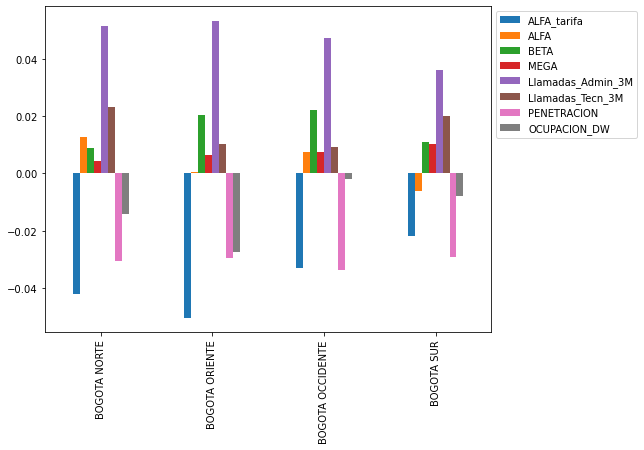

In [132]:
df_coef_T=df_coef.T
df_coef_T=df_coef_T.drop(columns=['const'])
if conGraficos:
    ax = df_coef_T[1:].plot.bar(figsize=(8, 6))
    ax.legend(bbox_to_anchor=(1.0, 1.0))
    ax.plot(figsize=(20,10));

In [133]:
DataSetEntregable_totales_reg=DataSetEntregable_totales_reg.append(df_coef_T[1:])
DataSetEntregable_totales_reg

,ALFA_tarifa,ALFA,BETA,MEGA,Llamadas_Admin_3M,Llamadas_Tecn_3M,PENETRACION,OCUPACION_DW
NACIONAL,-0.017476,0.008865,0.009765,0.023170,0.050608,0.011472,-0.029388,-0.013241
REGION COSTA,-0.019757,0.042046,-0.023846,-0.020725,0.075508,0.010354,-0.033697,-0.024475
REGION ORIENTE,-0.009202,0.009294,0.007034,0.013485,0.064914,0.014684,-0.033816,-0.006814
REGION CENTRO,-0.038683,0.005599,0.014219,0.009612,0.047440,0.015224,-0.028086,-0.015988
REGION NOROCCIDENTE,-0.015793,0.048529,-0.009022,0.019453,0.055411,0.012476,-0.012460,-0.014953
REGION OCCIDENTE,0.007709,-0.006447,0.022759,0.064162,0.046599,0.006247,-0.033902,-0.001214
BOGOTA,-0.038841,0.004814,0.014322,0.009913,0.047286,0.015618,-0.027427,-0.016063
CALI,0.013708,-0.021764,0.029499,0.090237,0.055866,-0.005739,-0.033183,0.000876
MEDELLIN,-0.013751,0.036643,0.002046,0.028993,0.067036,0.013872,-0.041908,-0.021973
PEREIRA,0.023559,0.018781,-0.005962,-0.015835,0.036265,0.009729,0.008085,0.017206


### Analisis Temporal

In [134]:
for reg in sectoresBog:
    data_aux=data_reg_nor_temp[data_reg_nor_temp['AREA']==reg]
    data_aux=data_aux.select_dtypes(include=['float64', 'int','int64'])
    (df_coef, df_vif)=dic_reg_mes_ind(data_aux)
    df_coef_T=df_coef.T
    df_coef_T.pop('const')
    df_coef_T=df_coef_T[1:]
    df_coef_T['CATEGORIA']=reg
    DataSetEntregable_totales_temp_reg=DataSetEntregable_totales_temp_reg.append(df_coef_T)

C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

11
1
2
3
4
5
6
7
8


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

9
10
11
1
2
3
4
5
6
7
8
9
10
11


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

In [135]:
DataSetEntregable_totales_temp_reg

,ALFA_tarifa,ALFA,BETA,MEGA,Llamadas_Admin_3M,Llamadas_Tecn_3M,PENETRACION,OCUPACION_DW,CATEGORIA
1,-0.011401,-0.004138,0.015219,0.040031,0.051113,0.011923,-0.026071,-0.019483,NACIONAL
2,-0.021567,0.031050,-0.008886,0.017460,0.062302,0.007288,-0.023751,-0.012510,NACIONAL
3,-0.021590,0.032400,0.003399,0.008272,0.062809,0.002431,-0.031399,-0.014982,NACIONAL
4,-0.013157,-0.036399,0.047913,0.054916,0.061400,0.011705,-0.034787,-0.014411,NACIONAL
5,-0.010143,0.018068,-0.004311,0.026079,0.056956,0.013154,-0.035471,-0.017043,NACIONAL
...,...,...,...,...,...,...,...,...,...
7,-0.007320,-0.042493,0.000172,0.006286,0.076189,0.026212,-0.039354,-0.020589,BOGOTA SUR
8,-0.031767,0.039516,0.008209,-0.012308,0.029240,0.014460,-0.026694,0.000257,BOGOTA SUR
9,0.050262,-0.002173,-0.017545,0.017448,0.063249,0.020684,-0.010835,-0.011303,BOGOTA SUR
10,0.046380,-0.057751,0.016307,0.066824,0.069508,0.023676,-0.032449,-0.018791,BOGOTA SUR


In [136]:
### Guardar Archivo

In [137]:
#DataSetEntregable_totales_reg.to_csv('RegresionesAgrupadas_14Dic.csv',sep=';')

In [138]:
#DataSetEntregable_totales_temp_reg.to_csv('RegresionesTemporales_14Dic.csv',sep=';')

## Resultados

In [139]:
DataSetEntregable_totales
DataSetEntregable_totales_temp
DataSetEntregable_totales_reg
DataSetEntregable_totales_temp_reg

,ALFA_tarifa,ALFA,BETA,MEGA,Llamadas_Admin_3M,Llamadas_Tecn_3M,PENETRACION,OCUPACION_DW,CATEGORIA
1,-0.011401,-0.004138,0.015219,0.040031,0.051113,0.011923,-0.026071,-0.019483,NACIONAL
2,-0.021567,0.031050,-0.008886,0.017460,0.062302,0.007288,-0.023751,-0.012510,NACIONAL
3,-0.021590,0.032400,0.003399,0.008272,0.062809,0.002431,-0.031399,-0.014982,NACIONAL
4,-0.013157,-0.036399,0.047913,0.054916,0.061400,0.011705,-0.034787,-0.014411,NACIONAL
5,-0.010143,0.018068,-0.004311,0.026079,0.056956,0.013154,-0.035471,-0.017043,NACIONAL
...,...,...,...,...,...,...,...,...,...
7,-0.007320,-0.042493,0.000172,0.006286,0.076189,0.026212,-0.039354,-0.020589,BOGOTA SUR
8,-0.031767,0.039516,0.008209,-0.012308,0.029240,0.014460,-0.026694,0.000257,BOGOTA SUR
9,0.050262,-0.002173,-0.017545,0.017448,0.063249,0.020684,-0.010835,-0.011303,BOGOTA SUR
10,0.046380,-0.057751,0.016307,0.066824,0.069508,0.023676,-0.032449,-0.018791,BOGOTA SUR
